In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
df = pd.read_csv("data.csv")
df = df.drop('Unnamed: 0', axis=1)

df.head()

,price,stock,maturity
0,0.000000,2.035873,0.5
1,0.133383,2.049620,0.5
2,0.091578,1.915976,0.5
3,0.317487,2.010661,0.5
4,0.142101,2.027230,0.5


In [24]:
y = df.price
X = df.drop('price', axis=1)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(f"Dimensionality of x_train: {x_train.shape}")
print(f"Dimensionality of X_test : {x_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (14400, 2)
Dimensionality of X_test : (4800, 2)
Dimensionality of y_train: (14400,)
Dimensionality of y_test : (4800,)


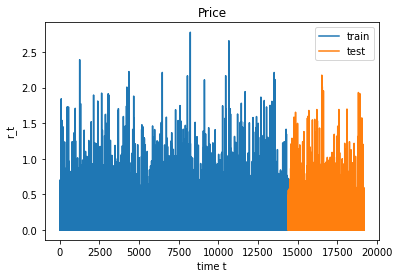

In [29]:
plt.title("Price") 
plt.xlabel("time t") 
plt.ylabel("r_t") 
plt.plot(range(y_train.size), y_train, label='train') 
plt.plot(range(y_train.size, y_train.size + y_test.size), y_test, label='test') 
plt.legend()
plt.show()

ridge regression

MMScaler = MinMaxScaler()
x_train_scaled = MMScaler.fit_transform(x_train)
x_test_scaled = MMScaler.transform(x_test)

In [74]:
parameters = {'alpha': np.arange(0.001, 0.01, 0.1)}
ridge = Ridge()
ridge_best = GridSearchCV(ridge, parameters, scoring ='neg_mean_squared_error')

ridge_best.fit(x_train_scaled, y_train)
y_pred_ridge = ridge_best.predict(X_test_scaled)

print("ridge best parameters:", ridge_best.best_params_)
print("ridge score:", ridge_best.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, y_pred_ridge))

ridge best parameters: {'alpha': 0.001}
ridge score: -0.05135538077968174
ridge MSE: 0.05135538077968174


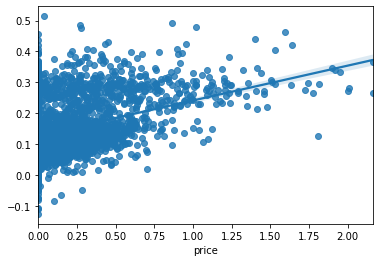

In [75]:
sns.regplot(y_test, y_pred )
plt.show()

linear regression

In [81]:
lin = LinearRegression()
lin.fit(x_train_scaled, y_train)
y_pred_lin = lin.predict(X_test_scaled)

print("ridge MSE:", mean_squared_error(y_test, y_pred_lin))

ridge MSE: 0.05135538792029219


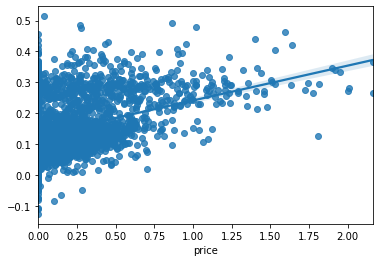

In [82]:
sns.regplot(y_test, y_pred_lin )
plt.show()

polynomial regression

Decision Tree regression

In [91]:
DTSplitList=[0.001,0.05,0.1, 0.99]
DTLeafList=[0.005, 0.1,0.5]
criterion =['mse']
max_depth = list(range(30,0,-2))
parameters = {'criterion':criterion,'max_depth':max_depth, 'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTR = DecisionTreeRegressor(random_state=10)
dec_tree = GridSearchCV(DTR, parameters, scoring ='neg_mean_squared_error')
dec_tree.fit(x_train, y_train)

y_pred_dec = dec_tree.predict(x_test)

print("DTR best parameters:", dec_tree.best_params_)
print("DTR score:", dec_tree.score(x_test, y_test))
print("DTR MSE:", mean_squared_error(y_test, y_pred_dec))

DTR best parameters: {'criterion': 'mse', 'max_depth': 4, 'min_samples_leaf': 0.005, 'min_samples_split': 0.05}
DTR score: -0.05142280871880629
DTR MSE: 0.05142280871880629


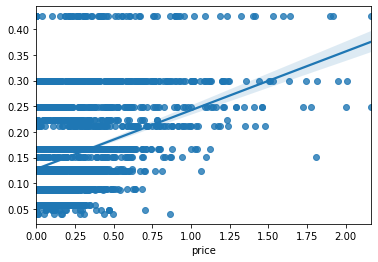

In [92]:
sns.regplot(y_test, y_pred_dec)
plt.show()

Random Forest

In [94]:
RFEstimatorList = [25,50,100,200]
criterion =['mse']
max_depth = list(range(30,0,-2))
parameters = {'criterion':criterion,'max_depth':max_depth,'n_estimators':RFEstimatorList}

RFR = RandomForestRegressor(random_state=10)
RFR_best = GridSearchCV(RFR, parameters, cv=5, verbose=0,scoring ='neg_mean_squared_error')
RFR_best.fit(x_train, y_train)

y_pred_random = RFR_best.predict(x_test)

print("RFR best parameters:", RFR_best.best_params_)
print("RFR score:", RFR_best.score(x_test, y_test))
print("RFR MSE:", mean_squared_error(y_test, y_pred_random))

RFR best parameters: {'criterion': 'mse', 'max_depth': 4, 'n_estimators': 50}
RFR score: -0.05116202883338666
RFR MSE: 0.05116202883338666


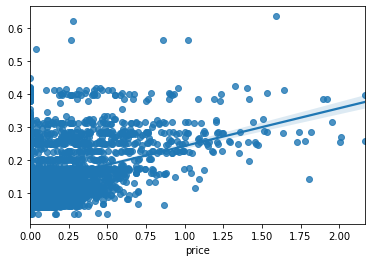

In [95]:
sns.regplot(y_test, y_pred_random )
plt.show()

Feature ranking:
1. feature 0 (0.722945)
2. feature 1 (0.277055)


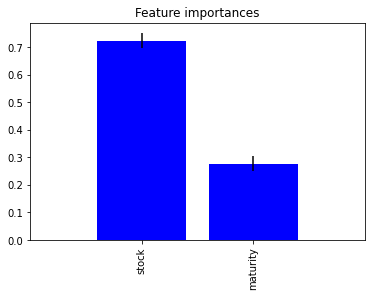

In [99]:
clf3=RandomForestRegressor(criterion= 'mse', max_depth= 10, n_estimators= 100,random_state=10)
clf3.fit(x_train, y_train)
features = X.columns
importances = clf3.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf3.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), [features[i] for i in indices])
plt.xticks(rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [100]:
import tensorflow.keras as keras
from keras.layers import Dense
from keras.models import Sequential
from keras.initializers import GlorotNormal

In [102]:
## sequential model
model = Sequential()

## layers configuration
input_dim = 1 ## only the price
neurons = 10
activation = 'elu'
init = GlorotNormal()

## add layer(s) to the model
model.add(Dense(units=neurons, input_dim=input_dim, activation=activation,
                kernel_initializer=init, bias_initializer=init))
model.add(Dense(units=neurons, activation=activation, kernel_initializer=init, bias_initializer=init))
model.add(Dense(units=neurons, activation=activation, kernel_initializer=init, bias_initializer=init))
model.add(Dense(1, activation=None, kernel_initializer=init))

In [103]:
from keras.optimizers import SGD

opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mse', optimizer=opt, metrics=['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [106]:
## params
epochs = 100
batch_size = 32 #X_train.size

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/100


ValueError: in user code:

    C:\Users\anita\miniconda3\envs\fbd\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\anita\miniconda3\envs\fbd\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\anita\miniconda3\envs\fbd\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\anita\miniconda3\envs\fbd\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\anita\miniconda3\envs\fbd\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\anita\miniconda3\envs\fbd\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\anita\miniconda3\envs\fbd\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\anita\miniconda3\envs\fbd\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\anita\miniconda3\envs\fbd\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape [32, 2]
